Total Classes Detected: 44
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 Directory /Users/harshithathimmapuram/Downloads/myData/43 does not exist. Skipping...
 


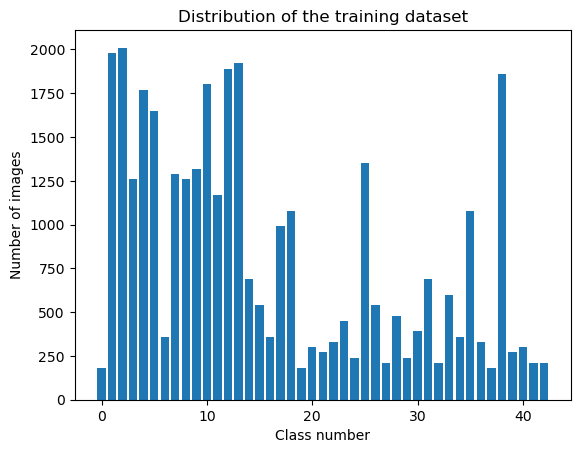

Shapes before training:
X_train shape: (22271, 32, 32, 3)
y_train shape: (22271, 43)
X_validation shape: (5568, 32, 32, 3)
y_validation shape: (5568, 43)
Data Shapes
Train(22271, 32, 32, 3) (22271, 43)
Validation(5568, 32, 32, 3) (5568, 43)
Test(6960, 32, 32, 3) (6960, 43)
After preprocessing:
X_train shape: (32, 32, 3)
X_validation shape: (32, 32, 3)
X_test shape: (32, 32, 3)
data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


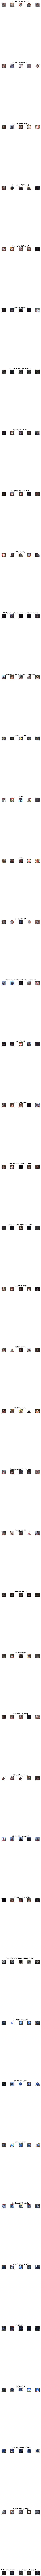

[115, 1258, 1272, 804, 1123, 1059, 225, 805, 828, 826, 1158, 752, 1251, 1217, 429, 365, 233, 636, 705, 113, 199, 164, 228, 296, 141, 851, 337, 136, 296, 148, 240, 421, 132, 375, 230, 687, 215, 115, 1224, 191, 202, 133, 136]


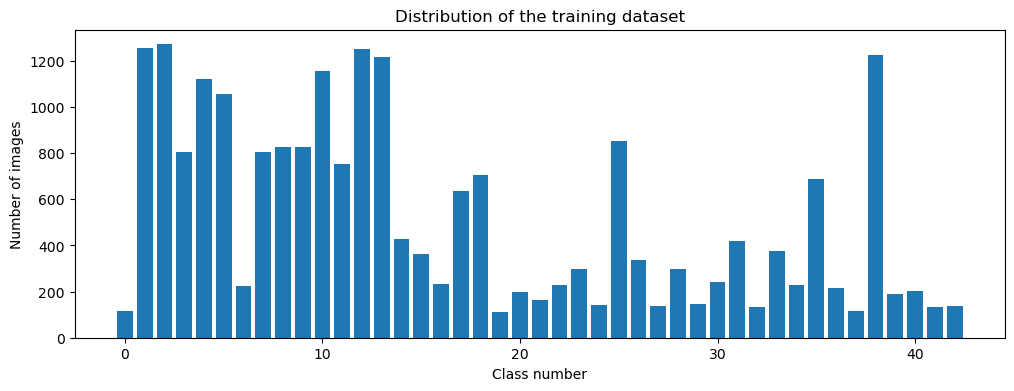

X_train shape after reshaping: (22271, 32, 32, 3)
X_validation shape after reshaping: (5568, 32, 32, 3)
X_test shape after reshaping: (6960, 32, 32, 3)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32, 32, 3)
y_batch shape: (50, 43)
X_batch shape: (50, 32,

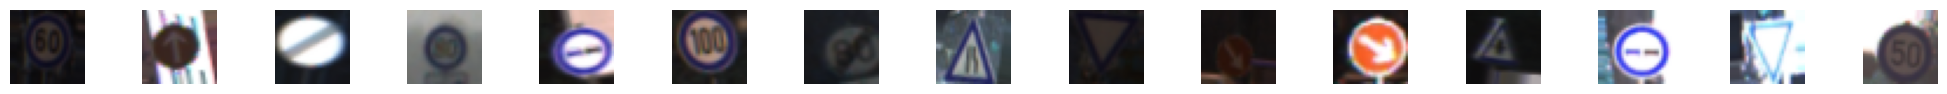

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 60)        4560      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                 

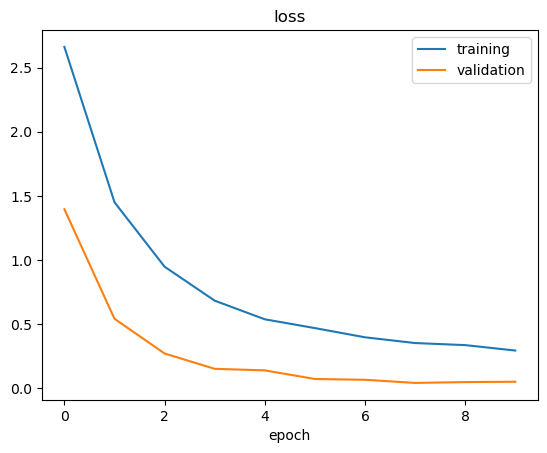

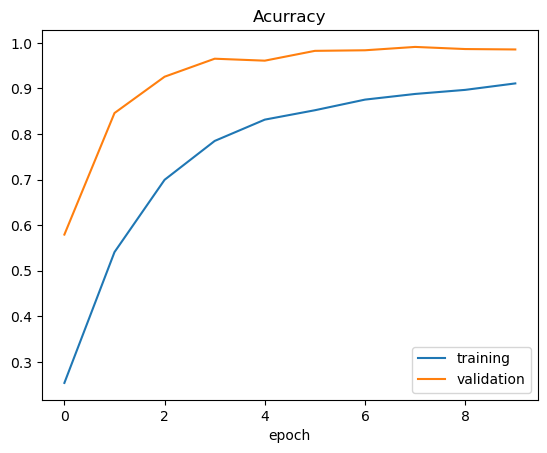

Test Score: 0.05162617936730385
Test Accuracy: 0.983476996421814


/Users/harshithathimmapuram/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Score: 0.05162617936730385
Test Accuracy: 0.983476996421814


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

################# Parameters #####################

path = "/Users/harshithathimmapuram/Downloads/myData"  # folder with all the class folders
labelFile = "/Users/harshithathimmapuram/Downloads/labels.csv"  # file with all names of classes
batch_size_val = 50  # how many to process together
steps_per_epoch_val = 2000
epochs_val = 10
imageDimensions = (32, 32, 3)
testRatio = 0.2  # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation

###################################################

############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = 43
print("Importing Classes.....")

for x in range(0, len(myList)):
    current_path = os.path.join(path, str(count))
    if os.path.exists(current_path):
        myPicList = os.listdir(current_path)
        for y in myPicList:
            curImg = cv2.imread(os.path.join(current_path, y))
            images.append(curImg)
            classNo.append(count)
        print(count, end=" ")
        count += 1
    else:
        print(f"Directory {current_path} does not exist. Skipping...")
print(" ")

images = np.array(images)
classNo = np.array(classNo)
# Plotting the distribution of the training dataset
num_classes = 43

# Plotting the distribution of the training dataset
num_of_samples = [np.sum(classNo == i) for i in range(num_classes)]
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

# Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_validation = to_categorical(y_validation, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
# Reshape labels
y_train = y_train.reshape(-1, num_classes)
y_validation = y_validation.reshape(-1, num_classes)

# Print shapes before training
print("Shapes before training:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)

# Check data shapes
print("Data Shapes")
print("Train", end=""); print(X_train.shape, y_train.shape)
print("Validation", end=""); print(X_validation.shape, y_validation.shape)
print("Test", end=""); print(X_test.shape, y_test.shape)
assert (X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels in the training set"
assert (X_validation.shape[0] == y_validation.shape[0]), "The number of images is not equal to the number of labels in the validation set"
assert (X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels in the test set"

# Add this print to check dimensions after preprocessing
print("After preprocessing:")
print("X_train shape:", X_train.shape[1:])  # This should match (32, 32, 3)
print("X_validation shape:", X_validation.shape[1:])  # This should match (32, 32, 3)
print("X_test shape:", X_test.shape[1:])  # This should match (32, 32, 3)

assert (X_train.shape[1:] == imageDimensions), "The dimensions of the Training images are wrong "
assert (X_validation.shape[1:] == imageDimensions), "The dimensions of the Validation images are wrong "
assert (X_test.shape[1:] == imageDimensions), "The dimensions of the Test images are wrong"


############################### READ CSV FILE
data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))

############################### DISPLAY SOME SAMPLES IMAGES OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):  # Iterate over class indices
        x_selected_indices = np.where(y_train[:, j] == 1)[0]  # Find indices of samples for class j
        selected_index = random.choice(x_selected_indices)  # Randomly choose an index
        selected_image = X_train[selected_index]  # Get the selected image from X_train
        axs[j][i].imshow(selected_image)
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + data.iloc[j]["Name"])
            num_of_samples.append(len(x_selected_indices))

# Show the plot
plt.show()

############################### DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

############################### PREPROCESSING THE IMAGES
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = img.astype('float32') / 255.0  # Convert to float and normalize to values between 0 and 1
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

# Assertions for image dimensions
assert (X_train.shape[1:] == imageDimensions), "The dimensions of the Training images are wrong "
assert (X_validation.shape[1:] == imageDimensions), "The dimensions of the Validation images are wrong "
assert (X_test.shape[1:] == imageDimensions), "The dimensions of the Test images are wrong"

# Add the depth dimension (for color images)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)

print("X_train shape after reshaping:", X_train.shape)
print("X_validation shape after reshaping:", X_validation.shape)
print("X_test shape after reshaping:", X_test.shape)

############################### AUGMENTATION OF IMAGES: TO MAKE IT MORE GENERIC
dataGen = ImageDataGenerator(
    width_shift_range=0.1,  # 0.1 = 10% IF MORE THAN 1 E.G 10 THEN IT REFERS TO NO. OF PIXELS EG 10 PIXELS
    height_shift_range=0.1,
    zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
    shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
    rotation_range=10  # DEGREES
)
dataGen.fit(X_train)
# Create a generator without using repeat
generator = dataGen.flow(X_train, y_train, batch_size=batch_size_val)
# REQUESTING DATA GENERATOR TO GENERATE IMAGES BATCH SIZE = NO. OF IMAGES CREATED EACH TIME IT'S CALLED
X_batch, y_batch = next(generator)
print("X_batch shape:", X_batch.shape)
print("y_batch shape:", y_batch.shape)


# TO SHOW AUGMENTED IMAGE SAMPLES
# TO SHOW AUGMENTED IMAGE SAMPLES
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    X_batch, y_batch = next(generator)  # Use 'generator' instead of 'batches'
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0], imageDimensions[1], imageDimensions[2]))
    axs[i].axis('off')
plt.show()

############################### CONVOLUTIONAL NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)  # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
    # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)  # SCALE DOWN ALL FEATURE MAP TO GENERALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500  # NO. OF NODES IN HIDDEN LAYERS
    model = Sequential()
    model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimensions[0], imageDimensions[1], 3),
                     activation='relu'))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))  # DOES NOT AFFECT THE DEPTH/NO OF FILTERS

    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5))  # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(num_classes, activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


    return model
# Train the model using fit_generator
model = myModel()  # Create the model
print(model.summary())  # Print model summary

# Assuming len(X_train) is the total number of training samples
total_samples = len(X_train)

# Calculate steps_per_epoch based on the batch size and total samples
steps_per_epoch_val = total_samples // batch_size_val

# Train the model using fit
history = model.fit(
    generator,
    steps_per_epoch=steps_per_epoch_val,  # Use steps_per_epoch_val instead of len(generator)
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=1
)
 
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
 
model.save("my_trained_model.h5")

# Store the model as a pickle object (optional)
pickle_out = open("model_trained.p", "wb")  # wb = WRITE BYTE
pickle.dump(model, pickle_out)
pickle_out.close()

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

cv2.waitKey(0)